In [100]:
import pandas as pd
import os
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import sklearn.linear_model as lm
import sklearn.metrics as metrics
import sklearn.model_selection as ms
import sklearn.preprocessing as pp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
### root directory
root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_data = os.path.join(root, 'data')

In [61]:
df_oxcgrt_testing = pd.read_csv(os.path.join(path_data, 'oxcgrt_h2_testing_policy.csv'), date_parser='date')
df_tweets = pd.read_csv(os.path.join(path_data, 'tweets.csv'), date_parser='date')

In [36]:
# find the date range of each countries' tweets
date_indonesia = df_tweets[df_tweets['country'] == 'id']['date'].agg(['min', 'max'])
date_india = df_tweets[df_tweets['country'] == 'in']['date'].agg(['min', 'max'])
date_america = df_tweets[df_tweets['country'] == 'us']['date'].agg(['min', 'max'])

In [48]:
df_tweets_avg = (df_tweets
                 .groupby(['date', 'country'])
                 .agg({'polarity': 'mean', 'subjectivity': 'mean'})  # aggregate the median of polarity and subjectivity
                 .rename({'polarity': 'avg_polarity', 'subjectivity': 'avg_subjectivity'}, axis=1)
                 .reset_index()
                 )

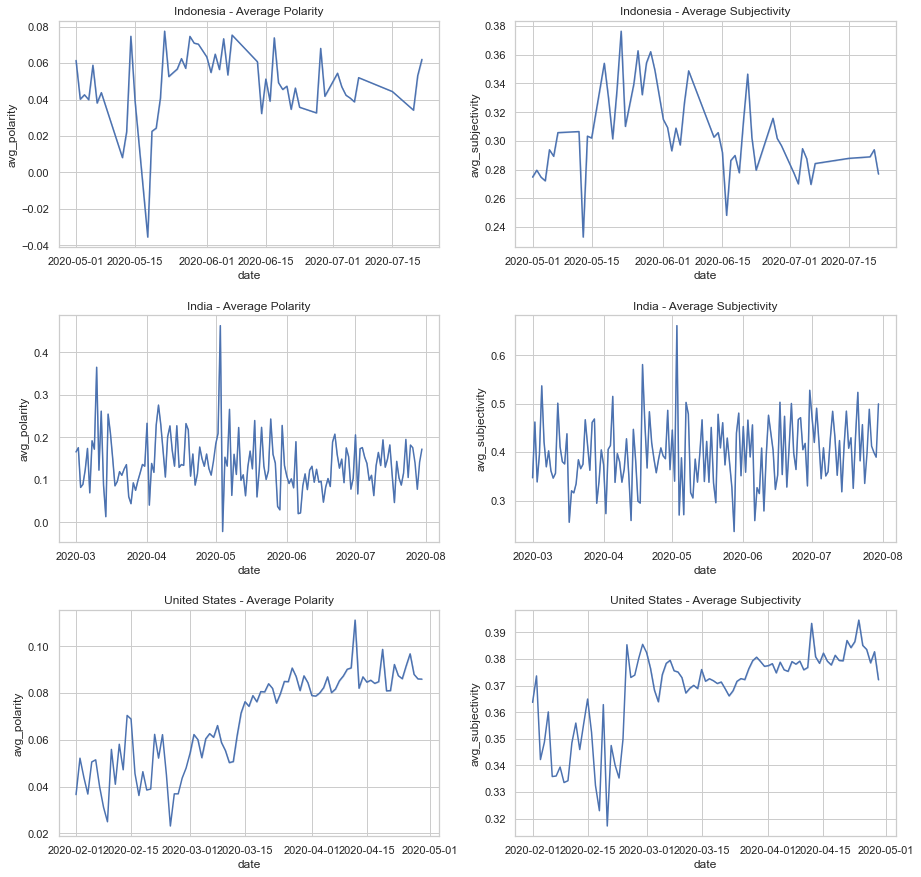

In [108]:
# plot the line chart of avg_polarity and avg_subjectivity
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'id'], x='date', y='avg_polarity', ax=ax[0, 0])
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'id'], x='date', y='avg_subjectivity', ax=ax[0, 1])
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'in'], x='date', y='avg_polarity', ax=ax[1, 0])
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'in'], x='date', y='avg_subjectivity', ax=ax[1, 1])
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'us'], x='date', y='avg_polarity', ax=ax[2, 0])
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'us'], x='date', y='avg_subjectivity', ax=ax[2, 1])
ax[0,0].set_title('Indonesia - Average Polarity')
ax[0,1].set_title('Indonesia - Average Subjectivity')
ax[1,0].set_title('India - Average Polarity')
ax[1,1].set_title('India - Average Subjectivity')
ax[2,0].set_title('United States - Average Polarity')
ax[2,1].set_title('United States - Average Subjectivity')
fig.subplots_adjust(hspace=0.3) # make the space between subplots larger
plt.savefig(os.path.join(path_data, 'tweets_sentiment_analysis.png'), dpi=300, bbox_inches='tight')

In [81]:
# compute the exponential moving average
df_tweets_avg['ema_polarity'] = df_tweets_avg.groupby('country')['avg_polarity'].transform(lambda x: x.ewm(span=7).mean())
df_tweets_avg['ema_subjectivity'] = df_tweets_avg.groupby('country')['avg_subjectivity'].transform(lambda x: x.ewm(span=7).mean())


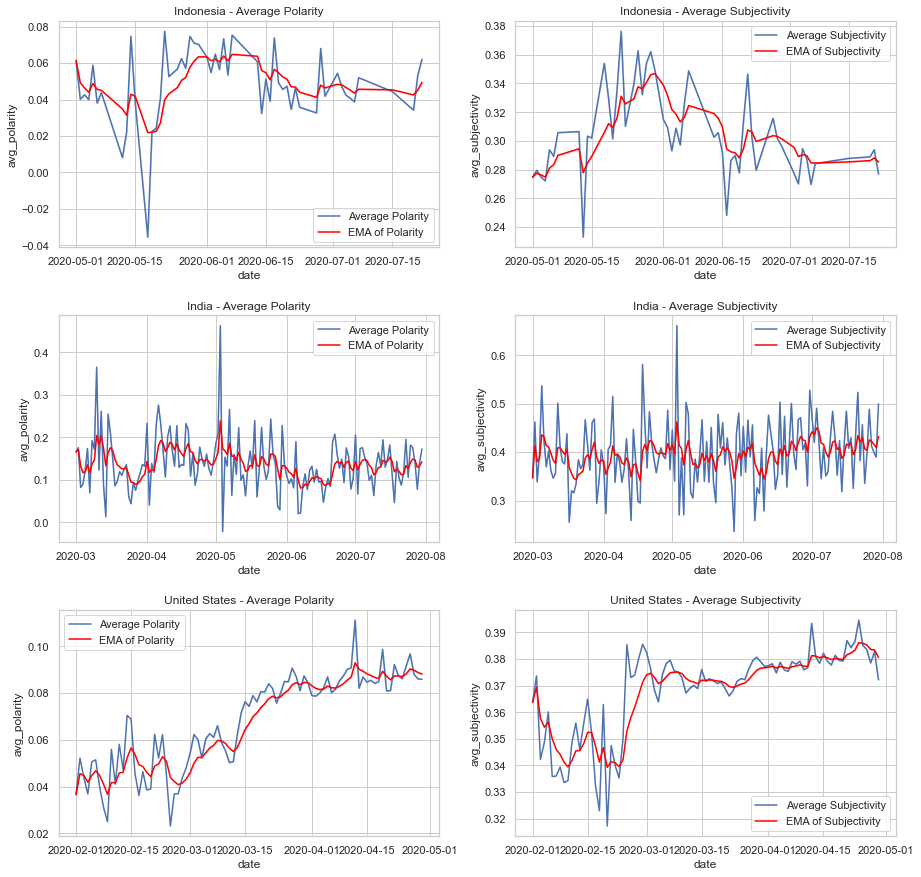

In [107]:
# plot the line chart of avg_polarity and avg_subjectivity
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'id'], x='date', y='avg_polarity', ax=ax[0, 0], label='Average Polarity')
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'id'], x='date', y='ema_polarity', ax=ax[0, 0], color='red', label='EMA of Polarity')
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'id'], x='date', y='avg_subjectivity', ax=ax[0, 1], label='Average Subjectivity')
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'id'], x='date', y='ema_subjectivity', ax=ax[0, 1], color='red', label='EMA of Subjectivity')
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'in'], x='date', y='avg_polarity', ax=ax[1, 0], label='Average Polarity')
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'in'], x='date', y='ema_polarity', ax=ax[1, 0], color='red', label='EMA of Polarity')
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'in'], x='date', y='avg_subjectivity', ax=ax[1, 1], label='Average Subjectivity')
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'in'], x='date', y='ema_subjectivity', ax=ax[1, 1], color='red', label='EMA of Subjectivity')
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'us'], x='date', y='avg_polarity', ax=ax[2, 0], label='Average Polarity')
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'us'], x='date', y='ema_polarity', ax=ax[2, 0], color='red', label='EMA of Polarity')
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'us'], x='date', y='avg_subjectivity', ax=ax[2, 1], label='Average Subjectivity')
sns.lineplot(data=df_tweets_avg[df_tweets_avg['country'] == 'us'], x='date', y='ema_subjectivity', ax=ax[2, 1], color='red', label='EMA of Subjectivity')
ax[0,0].set_title('Indonesia - Average Polarity')
ax[0,1].set_title('Indonesia - Average Subjectivity')
ax[1,0].set_title('India - Average Polarity')
ax[1,1].set_title('India - Average Subjectivity')
ax[2,0].set_title('United States - Average Polarity')
ax[2,1].set_title('United States - Average Subjectivity')
fig.subplots_adjust(hspace=0.3) # make the space between subplots larger
plt.savefig(os.path.join(path_data, 'tweets_sentiment_analysis_with_EMA.png'), dpi=300, bbox_inches='tight')

In [71]:
df_oxcgrt_testing['date'] = pd.to_datetime(df_oxcgrt_testing['date'])

In [88]:
# filter the date in df_oxcgrt_testing by the date range of each countries' tweets
df_oxcgrt_testing_indonesia = df_oxcgrt_testing[(df_oxcgrt_testing['date'] >= date_indonesia['min']) & (df_oxcgrt_testing['date'] <= date_indonesia['max']) & (df_oxcgrt_testing['country_code'] == 'IDN')]
df_oxcgrt_testing_india = df_oxcgrt_testing[(df_oxcgrt_testing['date'] >= date_india['min']) & (df_oxcgrt_testing['date'] <= date_india['max']) & (df_oxcgrt_testing['country_code'] == 'IND')]
df_oxcgrt_testing_america = df_oxcgrt_testing[(df_oxcgrt_testing['date'] >= date_america['min']) & (df_oxcgrt_testing['date'] <= date_america['max']) & (df_oxcgrt_testing['country_code'] == 'USA')]

df_oxcgrt_testing = pd.concat([df_oxcgrt_testing_indonesia, df_oxcgrt_testing_india, df_oxcgrt_testing_america], ignore_index=True)

In [90]:
## merge the oxcgrt testing data with the tweets data
df_tweets_avg = pd.merge(df_tweets_avg, df_oxcgrt_testing, on='date', how='left')

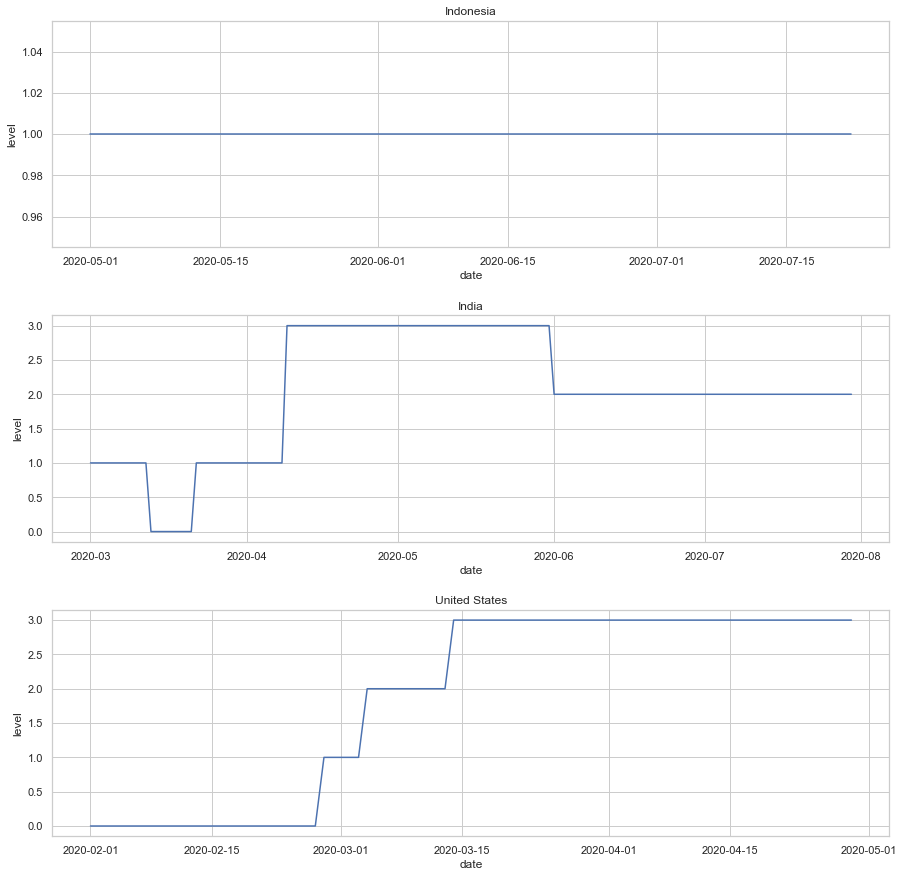

In [106]:
# plot line chart of testing policy
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
sns.lineplot(data=df_oxcgrt_testing_indonesia, x='date', y='level', ax=ax[0])
sns.lineplot(data=df_oxcgrt_testing_india, x='date', y='level', ax=ax[1])
sns.lineplot(data=df_oxcgrt_testing_america, x='date', y='level', ax=ax[2])
ax[0].set_title('Indonesia')
ax[1].set_title('India')
ax[2].set_title('United States')
fig.subplots_adjust(hspace=0.3) # make the space between subplots larger
plt.savefig(os.path.join(path_data, 'oxcgrt_testing.png'), dpi=300, bbox_inches='tight')

In [93]:
# do a correlation test between the testing policy and other variables by country
df_tweets_avg_indonesia = df_tweets_avg[df_tweets_avg['country'] == 'id']
df_tweets_avg_india = df_tweets_avg[df_tweets_avg['country'] == 'in']
df_tweets_avg_america = df_tweets_avg[df_tweets_avg['country'] == 'us']

print('Indonesia')
print(df_tweets_avg_indonesia[['avg_polarity', 'avg_subjectivity', 'level']].corr())
print('India')
print(df_tweets_avg_india[['avg_polarity', 'avg_subjectivity', 'level']].corr())
print('United States')
print(df_tweets_avg_america[['avg_polarity', 'avg_subjectivity', 'level']].corr())

Indonesia
                  avg_polarity  avg_subjectivity     level
avg_polarity          1.000000          0.168862 -0.042296
avg_subjectivity      0.168862          1.000000  0.096619
level                -0.042296          0.096619  1.000000
India
                  avg_polarity  avg_subjectivity     level
avg_polarity          1.000000          0.363178  0.083746
avg_subjectivity      0.363178          1.000000 -0.019163
level                 0.083746         -0.019163  1.000000
United States
                  avg_polarity  avg_subjectivity     level
avg_polarity          1.000000          0.647010  0.699978
avg_subjectivity      0.647010          1.000000  0.612363
level                 0.699978          0.612363  1.000000


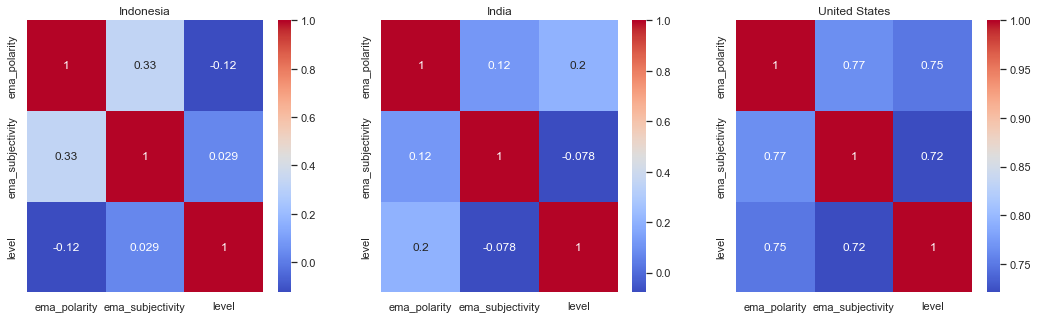

In [111]:
# plot the heatmap of the correlation test
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(df_tweets_avg_indonesia[['ema_polarity', 'ema_subjectivity', 'level']].corr(), annot=True, ax=ax[0], cmap='coolwarm')
sns.heatmap(df_tweets_avg_india[['ema_polarity', 'ema_subjectivity', 'level']].corr(), annot=True, ax=ax[1], cmap='coolwarm')
sns.heatmap(df_tweets_avg_america[['ema_polarity', 'ema_subjectivity', 'level']].corr(), annot=True, ax=ax[2], cmap='coolwarm')
ax[0].set_title('Indonesia')
ax[1].set_title('India')
ax[2].set_title('United States')
plt.savefig(os.path.join(path_data, 'correlation_test_ema.png'), dpi=300, bbox_inches='tight')

In [102]:
# do a regression test between the testing policy and other variables by country
print('Indonesia')
print(smf.ols(formula='level ~ avg_polarity + avg_subjectivity', data=df_tweets_avg_indonesia).fit().summary())
print('*' * 50)
print('India')
print(smf.ols(formula='level ~ avg_polarity + avg_subjectivity', data=df_tweets_avg_india).fit().summary())
print('*' * 50)
print('United States')
print(smf.ols(formula='level ~ avg_polarity + avg_subjectivity', data=df_tweets_avg_america).fit().summary())

Indonesia
                            OLS Regression Results                            
Dep. Variable:                  level   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6845
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.507
Time:                        12:29:50   Log-Likelihood:                -127.64
No. Observations:                 108   AIC:                             261.3
Df Residuals:                     105   BIC:                             269.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9559   

In [112]:
# do a regression test between the testing policy and other variables by country
print('Indonesia')
print(smf.ols(formula='level ~ ema_polarity + ema_subjectivity', data=df_tweets_avg_indonesia).fit().summary())
print('*' * 50)
print('India')
print(smf.ols(formula='level ~ ema_polarity + ema_subjectivity', data=df_tweets_avg_india).fit().summary())
print('*' * 50)
print('United States')
print(smf.ols(formula='level ~ ema_polarity + ema_subjectivity', data=df_tweets_avg_america).fit().summary())

Indonesia
                            OLS Regression Results                            
Dep. Variable:                  level   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.134
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.326
Time:                        12:54:39   Log-Likelihood:                -127.19
No. Observations:                 108   AIC:                             260.4
Df Residuals:                     105   BIC:                             268.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.3186   

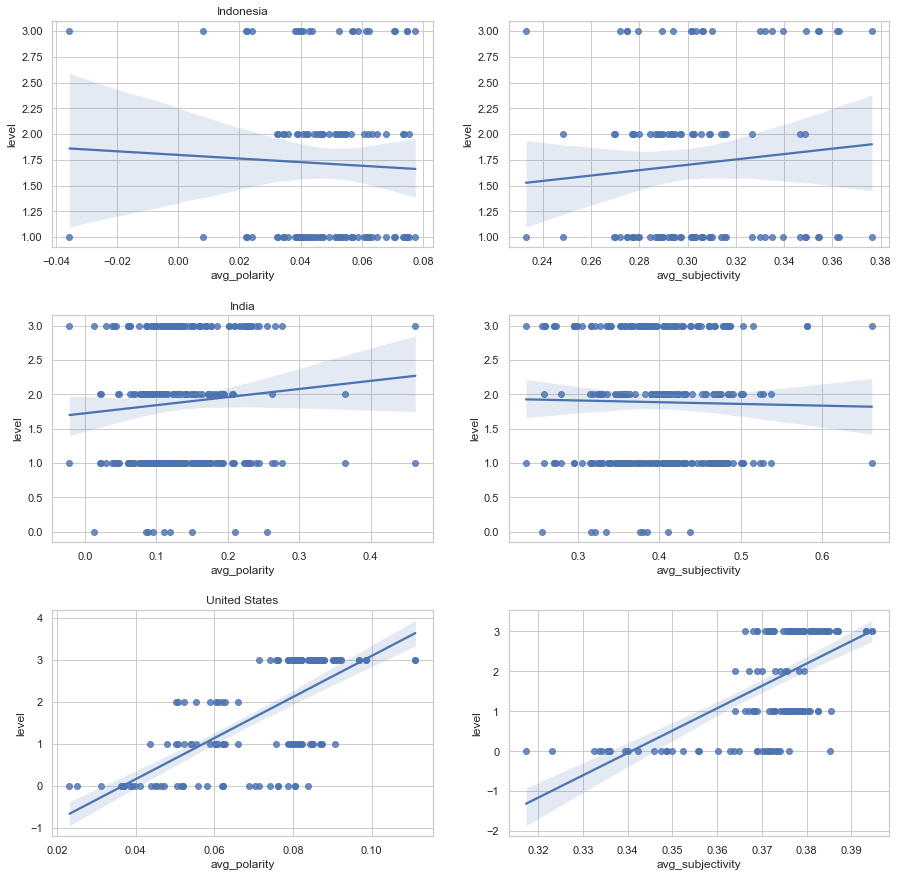

In [116]:
# plot the regression test results
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.regplot(data=df_tweets_avg_indonesia, x='avg_polarity', y='level', ax=ax[0, 0])
sns.regplot(data=df_tweets_avg_indonesia, x='avg_subjectivity', y='level', ax=ax[0, 1])
sns.regplot(data=df_tweets_avg_india, x='avg_polarity', y='level', ax=ax[1, 0])
sns.regplot(data=df_tweets_avg_india, x='avg_subjectivity', y='level', ax=ax[1, 1])
sns.regplot(data=df_tweets_avg_america, x='avg_polarity', y='level', ax=ax[2, 0])
sns.regplot(data=df_tweets_avg_america, x='avg_subjectivity', y='level', ax=ax[2, 1])
ax[0, 0].set_title('Indonesia')
ax[1, 0].set_title('India')
ax[2, 0].set_title('United States')
fig.subplots_adjust(hspace=0.3) # make the space between subplots larger
plt.savefig(os.path.join(path_data, 'regression_test_average.png'), dpi=300, bbox_inches='tight')

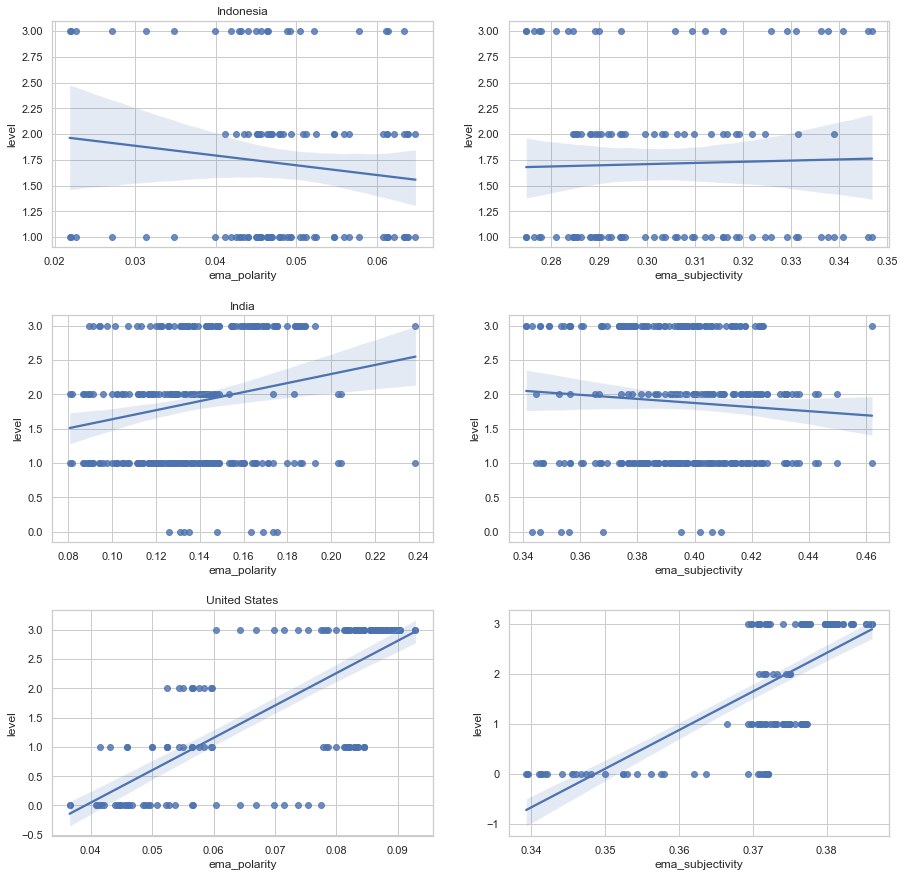

In [115]:
# plot the regression test results
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.regplot(data=df_tweets_avg_indonesia, x='ema_polarity', y='level', ax=ax[0, 0])
sns.regplot(data=df_tweets_avg_indonesia, x='ema_subjectivity', y='level', ax=ax[0, 1])
sns.regplot(data=df_tweets_avg_india, x='ema_polarity', y='level', ax=ax[1, 0])
sns.regplot(data=df_tweets_avg_india, x='ema_subjectivity', y='level', ax=ax[1, 1])
sns.regplot(data=df_tweets_avg_america, x='ema_polarity', y='level', ax=ax[2, 0])
sns.regplot(data=df_tweets_avg_america, x='ema_subjectivity', y='level', ax=ax[2, 1])
ax[0, 0].set_title('Indonesia')
ax[1, 0].set_title('India')
ax[2, 0].set_title('United States')
fig.subplots_adjust(hspace=0.3) # make the space between subplots larger
plt.savefig(os.path.join(path_data, 'regression_test.png'), dpi=300, bbox_inches='tight')